In [1]:
import pandas as pd 

def read_csv(path, codificaciones = ['utf-8', 'utf-8-sig', 'latin1']):
    for codificacion in codificaciones:
        try:
            df=pd.read_csv(path, encoding=codificacion)
            return df
        except UnicodeDecodeError:
            pass
    raise UnicodeEncodeError('todas las decodificaciones fallaron')

path = "E://files_pandas//morbilidad//t2015.csv"
df_morb = read_csv(path)


In [2]:
df_morb = df_morb.drop(columns=['DES_ESTADO','CVE_ESTADO','CVE_DIAGNO'])

df_group = df_morb.groupby(['DES_DIAGNO','CVE_CIE10']).sum(numeric_only= True).reset_index()

df_group = df_group.sort_values(by='ACUMULADO', ascending=False)

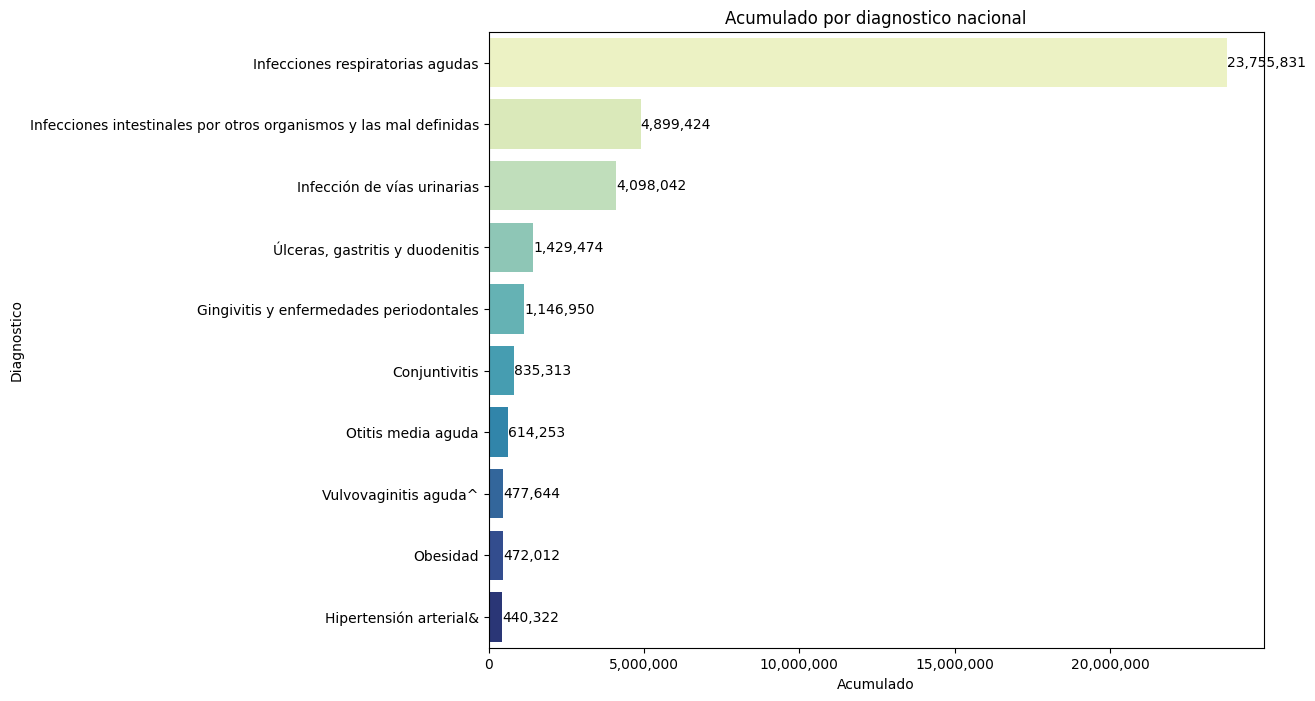

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_plot = df_group[['DES_DIAGNO', 'ACUMULADO']]
df_plot_top10 = df_plot.head(10)
plt.figure(figsize=(10,8))
ax = sns.barplot(x='ACUMULADO', y='DES_DIAGNO', data=df_plot_top10, palette='YlGnBu', hue='DES_DIAGNO', dodge=False, legend=False)

plt.xlabel('Acumulado')
plt.ylabel('Diagnostico')
plt.title('Acumulado por diagnostico nacional')

# Agregar los valores numéricos a las barras con separadores de miles
for index, value in enumerate(df_plot_top10['ACUMULADO']):
    ax.text(value, index, f'{value:,.0f}', color='black', ha="left", va="center")

# Formatear el eje x para que tenga separadores de miles
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))


plt.show()